In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

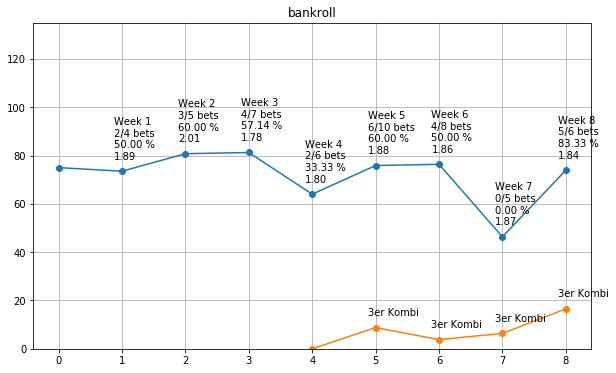

In [2]:
week = 8

bankroll = np.zeros(week + 1)
bankroll3er = np.zeros(week - 3)
bets_tot_week = np.zeros(week + 1)
bets_won_week = np.zeros(week + 1)
bets_lost_week = np.zeros(week + 1)
avg_coeff_week = np.zeros(week + 1)

bankroll[0] = 75.

for wk in range(week):

    wk += 1
    
    #del wetten
    with open('Week' + str(wk) + '/wagers_w' + str(wk) + '.txt') as f:
        wetten = list(f)    
        
    bets_tot = wetten.count('Einzelwette\n')
    bets_won = wetten.count('Gewonnen\n')
    bets_lost = wetten.count('Verloren\n')
    #print('week:', wk, 'bets:', bets_tot, 'won:', bets_won, 'lost:', bets_lost)
    #print('winning percentage: ', bets_won/bets_tot*100, '%') 
    
    bets_tot_week[wk] = bets_tot
    bets_won_week[wk] = bets_won
    bets_lost_week[wk] = bets_lost

    bet_list = []
    bet_matrix = np.zeros((bets_tot, 3))
    
    bet3er_tot = wetten.count('3er Kombi\n')
    bet3er_matrix = np.zeros((bet3er_tot, 2))

    bet_nr = 0
    for i in range(bets_tot):
        this_list = []
        bet_nr = wetten.index('Einzelwette\n', bet_nr + 1)
        #print(bet_nr)
        date = wetten[bet_nr - 1].rstrip()
        #print(date)
        this_list.append(date)
        size = wetten[bet_nr + 1].rstrip()
        #print(size)
        this_list.append(size)
        result = wetten[bet_nr + 2].rstrip()
        #print(result)
        this_list.append(result)
        if result=='Gewonnen':
            profit = wetten[bet_nr + 3].rstrip()
            jump = 1
        else:
            profit = '0,00 €' 
            jump = 0
        
        this_list.append(profit)
        teams = wetten[bet_nr + 4 + jump].rstrip()
        #print(teams)
        this_list.append(teams)
        handicap = wetten[bet_nr + 5 + jump].rstrip()
        #print(handicap3)
        this_list.append(handicap)
        quote = wetten[bet_nr + 6 + jump].rstrip()
        #print(quote)
        this_list.append(quote)
        score = wetten[bet_nr + 7 + jump].rstrip()
        #print(score)
        this_list.append(score)

        bet_list.append(this_list)

        ind1 = size.find('z')
        ind2 = size.find('€')
        bet_matrix[i, 0] = float(size[ind1 + 1:ind2 - 1].lstrip().replace(',', '.'))
        bet_matrix[i, 1] = float(profit[:-1].lstrip().replace(',', '.')) - bet_matrix[i, 0]
        bet_matrix[i, 2] = float(quote.replace(',', '.'))
        
    sum_size = np.sum(bet_matrix[:, 0])
    sum_profit = np.sum(bet_matrix[:, 1])
    avg_quote = np.mean(bet_matrix[:, 2])
    #print('investment:', sum_size)
    #print('profit:', sum_profit)
    #print('ROI:', sum_profit/sum_size)
    #print('Avg. coefficient:', avg_quote)
    #print()
        
    bankroll[wk] = bankroll[wk - 1] + sum_profit
    avg_coeff_week[wk] = avg_quote
    
    if wk >= 5:
        
        bet_nr3er = 0
        for i in range(bet3er_tot):
        
            bet_nr3er = wetten.index('3er Kombi\n', bet_nr3er + 1)
            #print(bet_nr3er)
            size3er = wetten[bet_nr3er + 1].rstrip()
            #print(size3er)
            result3er = wetten[bet_nr3er + 2].rstrip()
            #print(result3er)
            if result3er=='3erGewonnen':
                profit3er = wetten[bet_nr3er + 3].rstrip()
                jump3er = 1
            else:
                profit3er = '0,00 €' 
                jump3er = 0
            #print(profit3er, jump3er)
            ind1 = size.find('z')
            ind2 = size.find('€')
            bet3er_matrix[i, 0] = float(size3er[ind1 + 1:ind2 - 1].lstrip().replace(',', '.'))
            bet3er_matrix[i, 1] = float(profit3er[:-1].lstrip().replace(',', '.')) - bet3er_matrix[i, 0]
            #print(bet3er)
            
        sum_size3er = np.sum(bet3er_matrix[:, 0])
        sum_profit3er = np.sum(bet3er_matrix[:, 1])

        bankroll3er[wk - 4] = bankroll3er[wk - 5] + sum_profit3er
        #print(bankroll3er)
    
    
fig = plt.figure(1, figsize=(10,6))
ax1 = plt.plot(np.arange(week + 1), bankroll, 'o-')
ax2 = plt.plot(np.arange(4, week + 1), bankroll3er, 'o-')
plt.ylim([0, 1.8*bankroll[0]])
plt.grid()
plt.title('bankroll')

for wk in range(week):

    wk += 1
    plt.annotate('Week ' + str(wk) + '\n' + str(int(bets_won_week[wk])) + '/' 
                + str(int(bets_tot_week[wk])) + ' bets'
                + '\n{0:.2f} %'.format(bets_won_week[wk]/bets_tot_week[wk]*100) 
                + '\n{0:.2f}'.format(avg_coeff_week[wk]), (wk, bankroll[wk]), (wk - 0.12, bankroll[wk] + 5))
    
    if wk >= 5:
        plt.annotate('3er Kombi', (wk, bankroll3er[wk - 4]), (wk - 0.12, bankroll3er[wk - 4] + 5))

In [14]:
np.arange(4, wk + 1)

array([4, 5])

In [ ]:
str(bets_won_week[wk]/bets_tot_week[wk]*100)

In [ ]:
bankroll

In [ ]:
bet_matrix

In [ ]:
5*0.83*20

In [ ]:
wetten.index('Gewonnen\n')

In [ ]:
wetten[4]

In [ ]:
wetten.index('Gewonnen\n', 5)

In [ ]:
wetten[0].rstrip()

In [ ]:
wetten